In [1]:
from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['41d11a50ce17475b8912c7e1aca58e93.f-id.bd925aeee6284ec4beae4e3d00777dff']
ds = experiment.get_intermediate_dataset(
    node_id='39ed8e7a-ec21-419e-843c-cd5011190435-64936',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()

In [2]:
frame.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,city,state,name
0,2013,4,19,5,DL,11433,13303,837,-3,0,1138,1,0,0,Miami,FL,Miami International
1,2013,4,19,5,DL,14869,12478,1705,0,0,2336,-8,0,0,New York,NY,John F. Kennedy International
2,2013,4,19,5,DL,14057,14869,600,-4,0,851,-15,0,0,Salt Lake City,UT,Salt Lake City International
3,2013,4,19,5,DL,15016,11433,1630,28,1,1903,24,1,0,Detroit,MI,Detroit Metro Wayne County
4,2013,4,19,5,DL,11193,12892,1615,-6,0,1805,-11,0,0,Los Angeles,CA,Los Angeles International


In [3]:
frame.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,2719397.0,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06
mean,2013.0,6.979968e+00,1.579747e+01,3.898389e+00,1.274226e+04,1.274246e+04,1.326647e+03,1.043062e+01,2.003014e-01,1.505272e+03,6.566923e+00,2.166318e-01,1.067516e-02
std,0.0,1.984330e+00,8.799863e+00,1.985988e+00,1.501976e+03,1.501968e+03,4.713755e+02,3.593247e+01,4.002259e-01,4.939662e+02,3.844812e+01,4.119497e-01,1.027677e-01
min,2013.0,4.000000e+00,1.000000e+00,1.000000e+00,1.014000e+04,1.014000e+04,1.000000e+00,-6.300000e+01,0.000000e+00,1.000000e+00,-9.400000e+01,0.000000e+00,0.000000e+00
25%,2013.0,5.000000e+00,8.000000e+00,2.000000e+00,1.129200e+04,1.129200e+04,9.200000e+02,-4.000000e+00,0.000000e+00,1.120000e+03,-1.100000e+01,0.000000e+00,0.000000e+00
50%,2013.0,7.000000e+00,1.600000e+01,4.000000e+00,1.289200e+04,1.289200e+04,1.320000e+03,-1.000000e+00,0.000000e+00,1.528000e+03,-3.000000e+00,0.000000e+00,0.000000e+00
75%,2013.0,9.000000e+00,2.300000e+01,6.000000e+00,1.405700e+04,1.405700e+04,1.725000e+03,9.000000e+00,0.000000e+00,1.918000e+03,1.000000e+01,0.000000e+00,0.000000e+00
max,2013.0,1.000000e+01,3.100000e+01,7.000000e+00,1.537600e+04,1.537600e+04,2.359000e+03,1.863000e+03,1.000000e+00,2.359000e+03,1.845000e+03,1.000000e+00,1.000000e+00


### View Summary Statistics
Use the R summary and sd functions or the Python 'describe' function to display summary statistics for all columns in the DataFrame containing your flights data.

In [4]:
frame['ArrDelay'].describe()

count    2.719397e+06
mean     6.566923e+00
std      3.844812e+01
min     -9.400000e+01
25%     -1.100000e+01
50%     -3.000000e+00
75%      1.000000e+01
max      1.845000e+03
Name: ArrDelay, dtype: float64

### View Arrival Delay (ArrDelay) Distribution
Your eventual goal is to build a model that predicts the ArrDelay value. A useful starting point is to understand the range and distribution of values for this value. To further explore the range and distribution of values in the ArrDelay column, you must now create a plot that shows a box plot and a histogram of this value. The histogram should display the values in 30 bins.

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


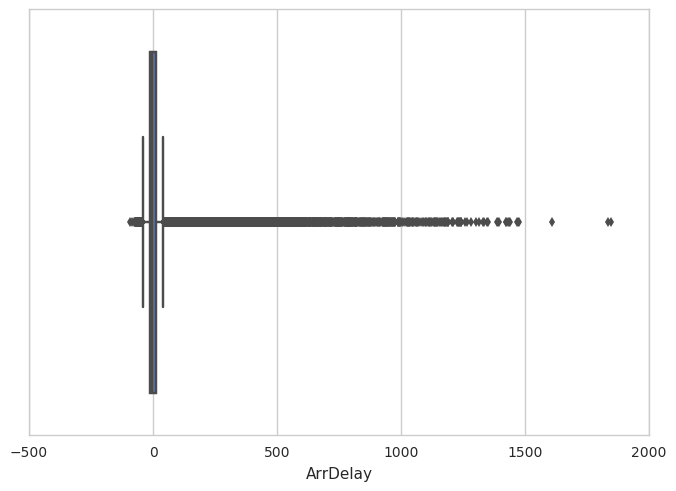

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

arrdelay = frame['ArrDelay']

sns.boxplot(x=arrdelay)
#plt.boxplot(arrdelay)
#plt.show()


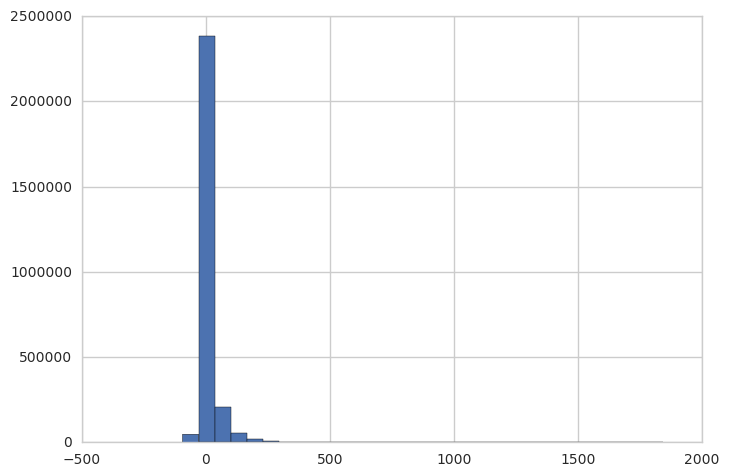

In [6]:
#sns.distplot(arrdelay, bins=30)
plt.hist(arrdelay, bins=30)
plt.show()

#### Conclusion for ArrDelay
1. The median, first quartile, and third quartile are all fairly close to 0, indicating that most flights arrive close to their scheduled time. 
2. The range of arrival times ranges extensively, with some flights arriving as much as 1500 minutes late.
3. The distribution is right-skewed, so there is a higher range of values for late flights than for early flights. 


### Use Histograms to Compare Numeric Columns - Conditioned Histograms
The flights dataset includes a number of numeric features (for example DepDelay, which indicates the number of minutes late a flight departed) or psuedo-numeric features (for example CRSDepTime, which indicates the scheduled departure time as a whole number in 24 hour clock format). To explore how these values might be related to arrival delay, you will plot histograms conditioned by the ArrDel15 column, which is a binary column indicating whether a flight arrived 15 or more minutes late.

Write code to generate CONDITIONED histograms for the following columns, conditioned by the ArrDel15 column:
    [DepDelay,
    CRSArrTime,
    CRSDepTime,
    DayofMonth,
    DayOfWeek,
    Month]

'ArrDel15'

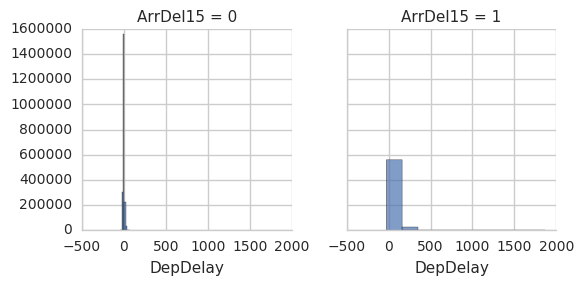

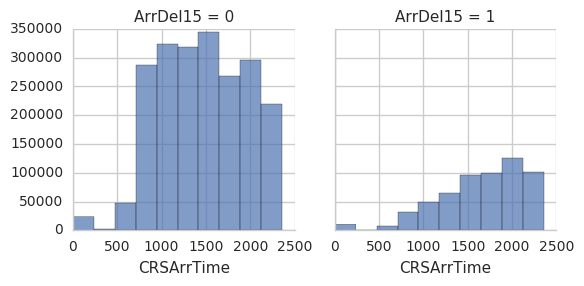

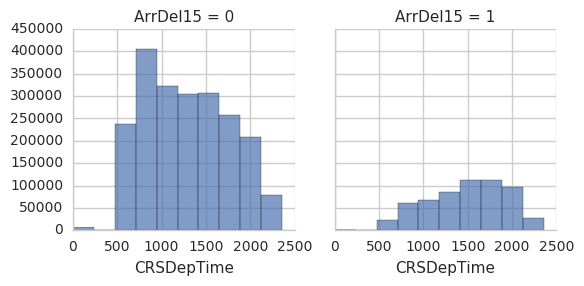

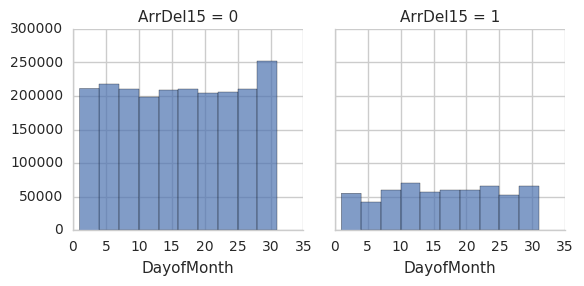

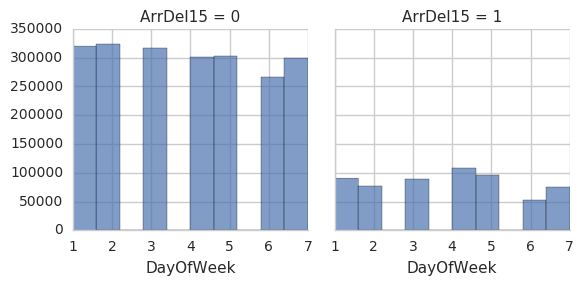

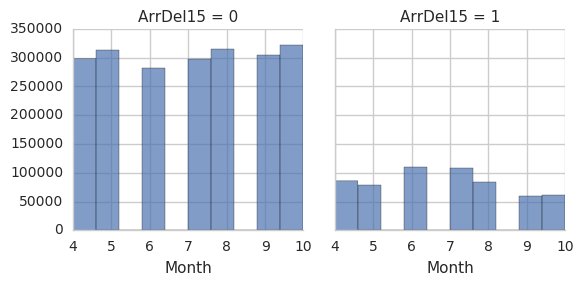

In [7]:
cols = ['DepDelay','CRSArrTime','CRSDepTime','DayofMonth','DayOfWeek','Month']

def cond_hists(df, plot_cols, grid_col):
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

cond_hists(frame, cols, 'ArrDel15')

#### Conclusion for Conditioned histograms for ArrDel15
1. There are significantly more flights that are less than 15 minutes late than there are flights that are 15 minutes late or more.
2. Flights that are 15 minutes or more late tend to have a higher DepDelay value than flights that are on-time. 
3. Late flights tend to occur more frequently for flights with a CRSArrTime that is later in the day, the highest volume of delayed flights scheduled to arrive between 3pm (1500 hours) and 8pm (2000 hours)




### Use Scatter Plots to Compare Numeric Columns
Scatter plots are another useful way to compare two numeric values, and can be conditioned on one or more variables using colors and shapes.
Write code to generate conditioned scatter plots for the following columns, conditioned by the ArrDel15 column using different colors for values of 0 and 1:

['DepDelay', 'CRSArrTime', 'CRSDepTime', 'DayofMonth', 'DayOfWeek', 'Month']

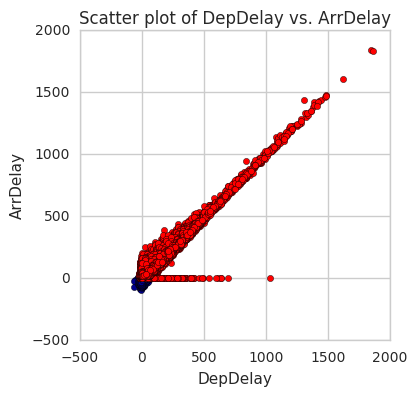

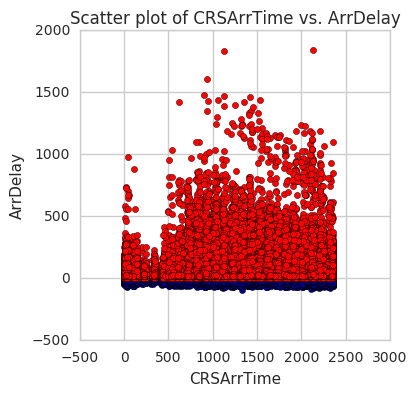

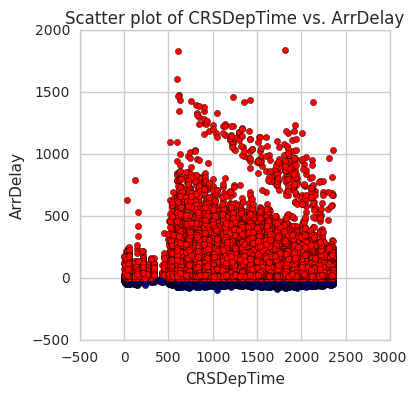

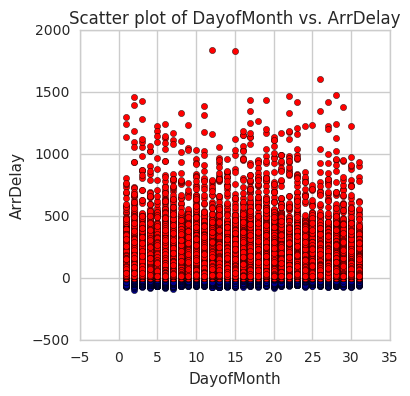

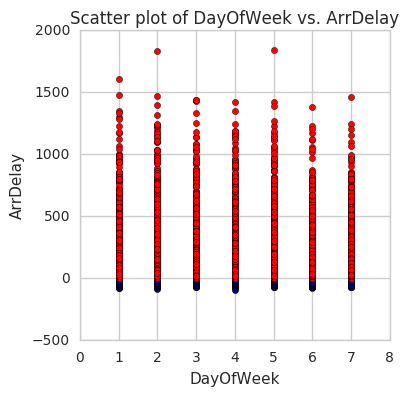

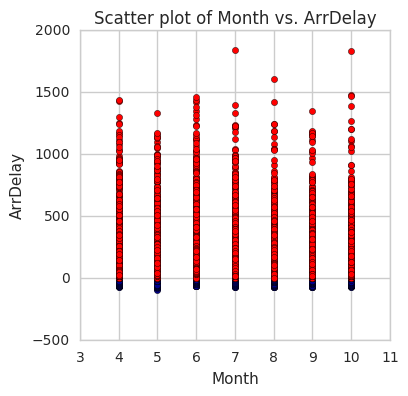

In [13]:
def cond_scatters(df, plot_cols, y, cond):
    for col in plot_cols:
        fig = plt.figure(figsize=(4, 4))
        ax = fig.gca()
        temp1 = df.ix[df[cond] == 0]       
        temp2 = df.ix[df[cond] == 1]
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = y,
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = y,
                           ax = ax, color = 'Red')
        ax.set_title('Scatter plot of ' + col + ' vs. ' + y)
    return plot_cols
            
cond_scatters(frame, cols, 'ArrDelay', 'ArrDel15')

#### Conclusion
1. There is a near-linear relatonship between DepDelay and ArrDelay for late flights. As departure delay increases, so does arrival delay.

2. There is an apparent relationship between ArrDelay and CRSDepTime. Flights that depart early in the morning are typically less delayed than flights that are scheduled to depart after around 5am (0500 hours), at which time delays tend to get significantly longer. Delays then gradually get shorter as the day progresses. 